In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from cartopy import crs as ccrs
import scipy.interpolate

# 1. Basic Data Analysis and Visualization

**Exercise 1:** Learning to use notebooks

1. Launch Jupyter Notebook and create a new notebook
2. Rename the notebook
3. Create a new cell and use *type()* to see if the following are floats and integers:
    * 2+2
    * 2\*2.0
    * var_float/var_int
---
**Solution:**

In [2]:
var_int = 8
var_float = 15.0

type(2+2), type(2*2.0), type(var_float/var_int)

(int, float, float)

**Exercise 2:** Import an ascii file

1. Import the dataset "20200901_20200930_Monterey.lev15.csv" and save it to a variable called *aeronet*.
2. Print the column names
3. Find a column that doesn't have only missing values (-999) and (challenge!) calculate the mean using the following syntax *variable\["column"\].mean()*
---
**Solution:**

In [3]:
fname = "data/20200901_20200930_Monterey.lev15.csv"
aeronet = pd.read_csv(fname, sep=',\s*', engine='python')

In [4]:
aeronet.head()

,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,...,Exact_Wavelengths_of_AOD(um)_380nm,Exact_Wavelengths_of_AOD(um)_340nm,Exact_Wavelengths_of_PW(um)_935nm,Exact_Wavelengths_of_AOD(um)_681nm,Exact_Wavelengths_of_AOD(um)_709nm,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty.1,Exact_Wavelengths_of_AOD(um)_Empty.2,Exact_Wavelengths_of_AOD(um)_Empty.3,Exact_Wavelengths_of_AOD(um)_Empty.4
0,0.071296,20:53:18,245,245.870347,0.061169,0.167012,0.238173,-999,-999,0.400838,...,0.3794,0.3409,0.9365,-999,-999,-999,-999,-999,-999,-999
1,0.071296,20:58:18,245,245.873819,0.061155,0.168417,0.239952,-999,-999,0.404648,...,0.3794,0.3409,0.9365,-999,-999,-999,-999,-999,-999,-999
2,0.071296,21:03:18,245,245.877292,0.063135,0.173143,0.246827,-999,-999,0.414668,...,0.3794,0.3409,0.9365,-999,-999,-999,-999,-999,-999,-999
3,0.071296,21:08:18,245,245.880764,0.061754,0.170541,0.241485,-999,-999,0.405998,...,0.3794,0.3409,0.9365,-999,-999,-999,-999,-999,-999,-999
4,0.071296,21:18:18,245,245.887708,0.059059,0.163919,0.232041,-999,-999,0.391191,...,0.3794,0.3409,0.9365,-999,-999,-999,-999,-999,-999,-999


In [5]:
aeronet["AOD_1640nm"].mean()

-1.7637041143410852

---
**Exercise 3:** Filtering data

Using the dataset imported in the previous example (*aeronet*):
    
1. Create a mask that filters the "AOD_870nm" column to only include values that are above 0.
2. Create a new variables, *day_of_year*, with the mask applied to aeronet\["Day_of_Year(Fraction)"\].
3. Create a new variables, *aod_870*, with the mask applied to aeronet\["AOD_870nm"\].
4. Compare the mean value of *aeronet\["AOD_870nm"\]* to *aod_870*.
    
---
**Solution**

In [6]:
mask_aod = (aeronet["AOD_870nm"] > 0 )

In [7]:
day_of_year = aeronet["Day_of_Year(Fraction)"][mask_aod]
aod_870 = aeronet["AOD_870nm"][mask_aod]

In [8]:
aeronet["AOD_870nm"].mean(), aod_870.mean()

(-0.3344563769379846, 0.6341813957322987)

---
**Exercise 4:** Create a scatterplot

Use the variables *aod_870* and *day_of_year* that you made in Exercise 3 to:

1. Create a scatter plot showing the *day_of_year* (x-axis) and *aod_870* (y-axis)
2. Add y-axis and x-axis labels using *.set_xlabel()* and *.set_ylabel()*
3. Adjust the color and size of the scatterplot

---
**Solution**

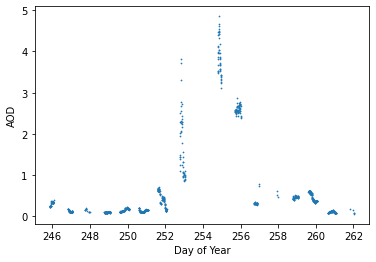

In [9]:
fig = plt.figure() 
ax = plt.subplot()
ax.scatter(day_of_year, aod_870, s=0.5)
ax.set_xlabel('Day of Year')
ax.set_ylabel('AOD')
plt.show()

# 2. Scientific Data Formats and Advanced Plotting

---
**Exercise 1**: Importing netCDF files
1. Open the file "MOP03JM-201811-L3V95.6.3_thinned.nc" using the netCDF4 library
2. Print the variable names
3. What are the dimensions?
---

**Solution:**

In [10]:
fname = 'data/MOP03JM-201811-L3V95.6.3_thinned.nc' 
mop_file_id = Dataset(fname, 'r')

In [11]:
mop_file_id

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): YDim(180), XDim(360)
    variables(dimensions): float32 Latitude(YDim), float32 Longitude(XDim), float32 RetrievedCOTotalColumnDay(XDim,YDim)
    groups: 

---
**Exercise 2**: Plot 3-dimensional data

Plot *AOD_lat*, *AOD_lon*, and *AOD_500* (which we imported from the "JRR-AOD_v2r3_j01_..." netCDF file as:

1. Check the dimensions for all variables using *.shape*.
2. Do you need to generate a meshgrid with *np.meshgrid()*?
3. Create a contour plot

---
**Solution:**

In [12]:
fname='data/JRR-AOD_v2r3_j01_s202009152044026_e202009152045271_c202009152113150_thinned.nc'
aod_file_id = Dataset(fname)

AOD_550 = aod_file_id.variables['AOD550'][:,:]
AOD_lat = aod_file_id.variables['Latitude'][:,:]
AOD_lon = aod_file_id.variables['Longitude'][:,:]

In [13]:
AOD_lat.shape, AOD_lon.shape

((768, 3200), (768, 3200))

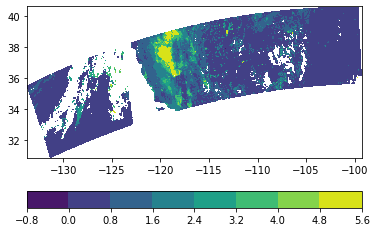

In [14]:
fig = plt.figure() 
ax = plt.subplot()
co_plot = ax.contourf(AOD_lon, AOD_lat, AOD_550)
fig.colorbar(co_plot, orientation='horizontal')
plt.show()

---
**Exercise 3** Adding maps to plots

Using *AOD_lat*, *AOD_lon*, and *AOD_550* (which we imported from the "JRR-AOD_v2r3_j01_..." netCDF file):

1. Create a *contourf* plot (same as Exercise 2)
2. Add the coastlines to a standard Plate Caree plot using *projection=* option.

---
**Solution**:

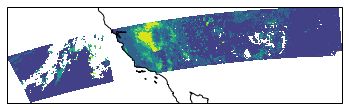

In [15]:
fig = plt.figure()
ax = plt.subplot(projection=ccrs.PlateCarree())

ax.contourf(AOD_lon, AOD_lat, AOD_550)

ax.coastlines('50m')
plt.show()

# 3. Image Combination and Gridding Data

---
**Exercise 1**: Combining images from two different channels
1. Open the following two files (in "data/meso") using the netCDF4 library:
    * Channel 13: OR_ABI-L1b-RadM1-M3C13_G16_s20182822019282_e20182822019350_c20182822019384.nc
    * Channel 2: OR_ABI-L1b-RadM1-M3C02_G16_s20182822019282_e20182822019339_c20182822019374.nc
2. From each file, extract the 'Rad' variable (radiance) and save it to a new variable.
3. Check the dimensions - they are not the same! Use the Numpy array slide syntax (::) to make the dimensions match
4. Take the difference between channel 2 and  channel 13 (Ch02 - C13) 
5. Make a plot using plt.imshow()
---

**Solution:**

In [16]:
# Import radiance from ABI Channel 13, 10.3 micrometers
fname = "data/meso/OR_ABI-L1b-RadM1-M3C13_G16_s20182822019282_e20182822019350_c20182822019384.nc"
g16nc = Dataset(fname, 'r')
C13 = g16nc.variables['Rad'][:]

# Import radiance from ABI Channel 2, .64 micrometers
fname = "data/meso/OR_ABI-L1b-RadM1-M3C02_G16_s20182822019282_e20182822019339_c20182822019374.nc"
g16nc = Dataset(fname, 'r')
C02 = g16nc.variables['Rad'][:]

In [17]:
# C02 is 4x larger than C13!
print(C13.shape, C02.shape)

(500, 500) (2000, 2000)


In [18]:
# Using the numpy slice syntax to take every 4th element along x and y:
C02 = C02[::4, ::4]

# Take the difference between channel 2 and channel 3
sandwich = C02 - C13

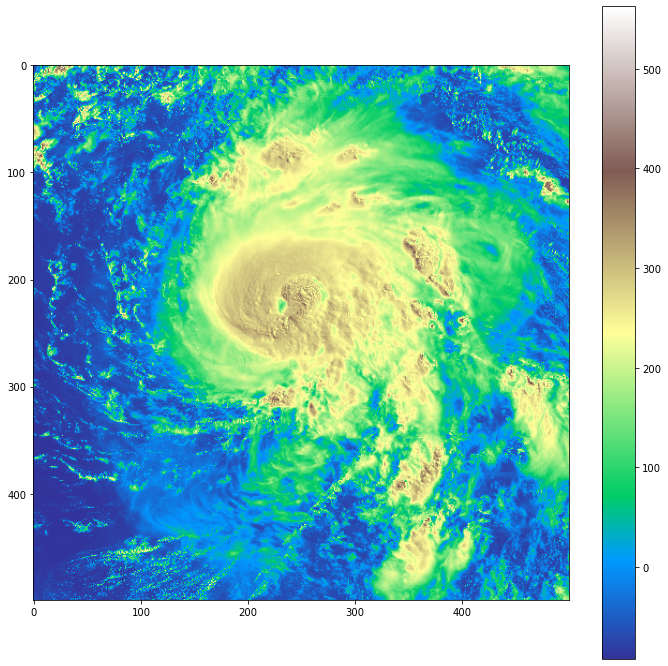

In [19]:
# Make a plot
plt.figure(figsize=[12,12])
plt.imshow(sandwich, cmap=plt.get_cmap("terrain"))
plt.colorbar()
plt.show()

---
**Exercise 2**: Regridding a regularly spaced dataset

We will practice converting a 2 x 2 degree, regularly spaced grid to a 5-degree regularly spaced grid. This example has a lot of steps but closely follows the IMERG regridding example. We will use NOAA Extended Reconstructed Sea Surface Temperature (SST) V5 dataset, which has 2 degree spacing. This dataset is similar the the IMERG dataset, with the following differences:
* The SST dataset is netCDF, while IMERG is an HDF. There are no groups in the SST dataset.
* The longitude coordinates are expressed from 0 to 360 degrees; IMERG is from -180 to 180 degrees.
* The SST dataset has more than one time coordinate, we will use the first one (index 0), which corresponds to January. Feel free to look at any other ones!

Here are the steps:
1. Import sst.mon.ltm.1981-2010.nc, which has monthly long-term mean SST values.
2. Extract the following variables:
    * 'sst' is a 3-dimensional variable, time, lat, and lon. We will only import the first month (index 0), so use \[0,:,:\]
    * 'lat', 'lon' are 1-dimensional variables. Latitude goes from negative to positive, and longitude spans 0 to 360.
3. Define the new lat, lon grid that has 5 degrees of spacing
    * Create a new variable called gridsize
    * Calculate the number of longitude points and latitude 
4. Define a 1-dimensional list of the original 2 degree lat, lon grid
    * Create a 2-dimensional lat, lon using the np.meshgrid ( e.g. np.meshgrid(lon, lat, indexing='xy'))
5. Interpolate the original SST to the new 5-degree grid.
    * Flatten (using .flatten() ) the ssts so that it is 1-dimensional
6. Create a plot showing the old and the new data.
    * The data are from 0 to 360, we need to set the central longitude to -180 on the map!
    * You can change thevartiable names in the pcolormesh lines to reflect any differences in your variable names.
    
```python
fig = plt.figure(figsize=[15,15])

to_proj = ccrs.PlateCarree(central_longitude=-180)
from_proj = ccrs.PlateCarree()

ax = plt.subplot(projection=to_proj)
ax.coastlines('10m', color='black')

# For the original 2-degree grid
ax.pcolormesh(Xold, Yold, sst, vmin=0, vmax=30, transform=from_proj)

# For the new 5-degree grid
#ax.pcolormesh(Xnew, Ynew, gridOut, vmin=0, vmax=30, transform=from_proj)


plt.show()
```

---

**Solution:**

In [20]:
fname = "data/sst.mon.ltm.1981-2010.nc"
sst_nc = Dataset(fname, 'r')

In [21]:
# The variable name are provided, but it's useful to look still!
print(sst_nc.variables.keys())

dict_keys(['lat', 'lon', 'time', 'climatology_bounds', 'sst', 'valid_yr_count'])


In [22]:
# Extract the variables
# SST has the dimensions of month, lat, and lon. We set the first index to 0 to only look at January mean SST.
sst = sst_nc.variables['sst'][0,:,:]
lat = sst_nc.variables['lat'][:]
lon = sst_nc.variables['lon'][:]

In [36]:
# The original data is two degrees, change it to ten degrees
grid_size = 5.0

# Note the dataset is from 0 to 360, NOT -180 to 180
coverage = [0.0 , -90.0 , 360 , 90.0]

num_points_x = int((coverage[2] - coverage[0])/grid_size)
num_points_y = int((coverage[3] - coverage[1])/grid_size)

nx = complex(0, num_points_x)
ny = complex(0, num_points_y)

Xnew, Ynew = np.mgrid[coverage[0]:coverage[2]:nx, coverage[1]:coverage[3]:ny]

In [43]:
# Change the 2-dimensional data to 1-dimensional
values = sst.flatten()

# Create an empty array that's the length of the 1-dimensional sst array and 2-dimensional (one for x, and one for y)
dims = (values.shape[0], 2)
points =  np.zeros(dims)

# Fill the array with the 1-dimensional lon and lat data.
Xold, Yold = np.meshgrid(lon, lat, indexing='xy')

points[:, 0] = Xold.flatten()
points[:, 1] = Yold.flatten()

# Interpolate to the new grid.
gridOut = scipy.interpolate.griddata(points, values, (Xnew, Ynew), method='linear')

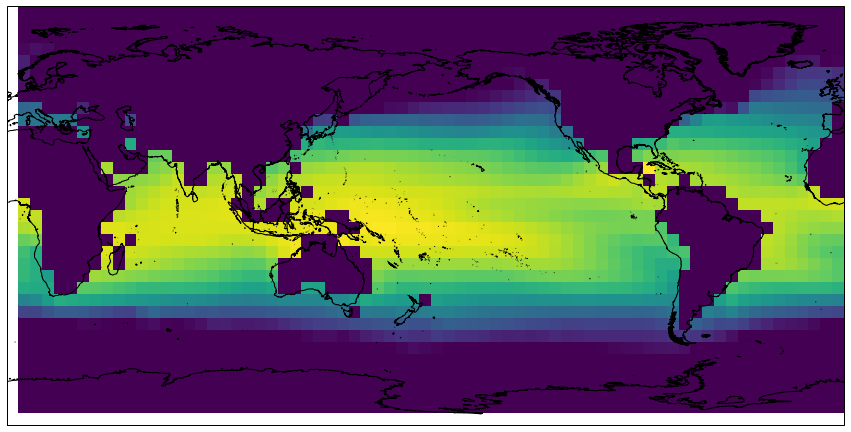

In [44]:
fig = plt.figure(figsize=[15,15])

to_proj = ccrs.PlateCarree(central_longitude=-180)
from_proj = ccrs.PlateCarree()

ax = plt.subplot(projection=to_proj)
ax.coastlines('10m', color='black')
ax.pcolormesh(Xnew, Ynew, gridOut, vmin=5, vmax=30, transform=from_proj)

plt.show()

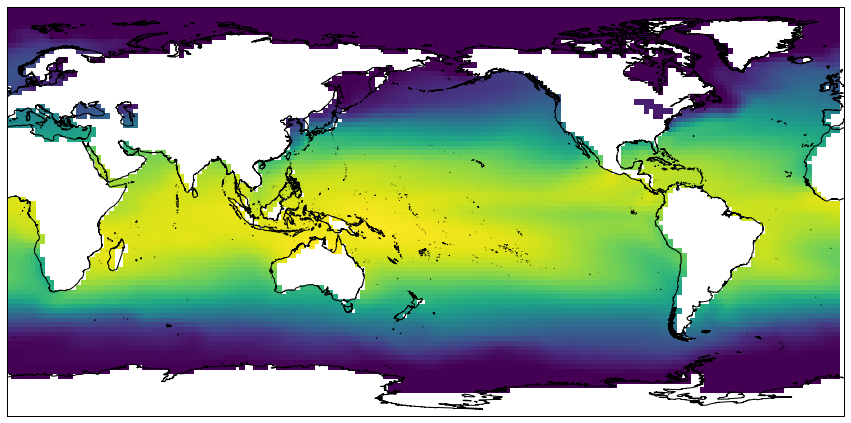

In [31]:
fig = plt.figure(figsize=[15,15])

to_proj = ccrs.PlateCarree(central_longitude=-180)
from_proj = ccrs.PlateCarree()

ax = plt.subplot(projection=to_proj)
ax.coastlines('10m', color='black')
ax.pcolormesh(Xold, Yold, sst, vmin=0, vmax=30, transform=from_proj)

plt.show()